Image Classification using CNN

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(X_train,Y_train),(X_test,Y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 12s 0us/step


In [4]:
print(X_test.shape)
print(X_train.shape)

(10000, 32, 32, 3)
(50000, 32, 32, 3)


In [5]:
print(Y_train[:5])

[[6]
 [9]
 [9]
 [4]
 [1]]


In [6]:
Y_train = Y_train.reshape(-1,)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
Y_test = Y_test.reshape(-1,)
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [8]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X,Y,index):
   plt.figure(figsize=(15,2))
   plt.imshow(X[index])
   plt.xlabel(classes[Y[index]])

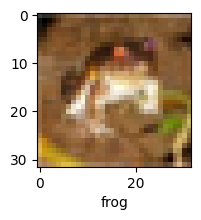

In [10]:
plot_sample(X_train,Y_train,0)

In [11]:
#Normalization
X_train = X_train/255.0
X_test = X_test/255

In [12]:
cnn = models.Sequential([

    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")

])

In [13]:
cnn.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [14]:
history = cnn.fit(X_train,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1407/1407 [==============================] - 71s 49ms/step - loss: 1.5043 - accuracy: 0.4577 - val_loss: 1.2137 - val_accuracy: 0.5672
Epoch 2/10
1407/1407 [==============================] - 69s 49ms/step - loss: 1.1383 - accuracy: 0.6020 - val_loss: 1.0363 - val_accuracy: 0.6392
Epoch 3/10
1407/1407 [==============================] - 75s 53ms/step - loss: 1.0019 - accuracy: 0.6526 - val_loss: 0.9941 - val_accuracy: 0.6542
Epoch 4/10
1407/1407 [==============================] - 60s 42ms/step - loss: 0.9154 - accuracy: 0.6801 - val_loss: 1.0582 - val_accuracy: 0.6388
Epoch 5/10
1407/1407 [==============================] - 60s 43ms/step - loss: 0.8498 - accuracy: 0.7055 - val_loss: 0.9359 - val_accuracy: 0.6822
Epoch 6/10
1407/1407 [==============================] - 59s 42ms/step - loss: 0.7942 - accuracy: 0.7242 - val_loss: 0.8972 - val_accuracy: 0.7022
Epoch 7/10
1407/1407 [==============================] - 62s 44ms/step - loss: 0.7437 - accuracy: 0.7400 - val_loss: 0.9152 -

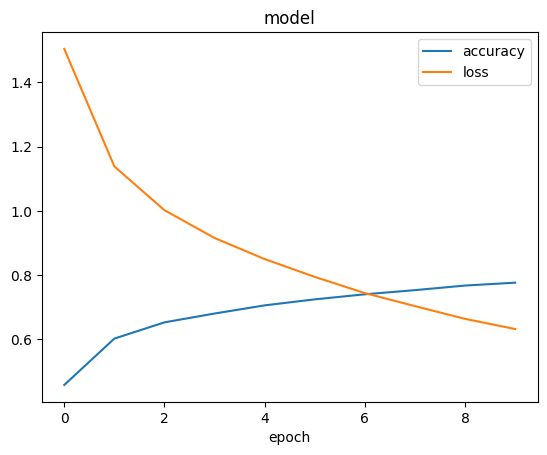

In [15]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("model")
plt.xlabel("epoch")
plt.legend(["accuracy","loss"])

In [16]:
loss,accuarcy=cnn.evaluate(X_test,Y_test)


313/313 [==============================] - 4s 12ms/step - loss: 0.9589 - accuracy: 0.6925


In [17]:
y_pred = cnn.predict(X_test)
y_pred[:3]

313/313 [==============================] - 4s 11ms/step


array([[1.95781467e-04, 4.04968252e-03, 1.85498875e-02, 8.54868889e-01,
        3.24707333e-04, 9.04110074e-02, 1.21123111e-03, 4.83501615e-04,
        2.90452298e-02, 8.60121800e-04],
       [2.63920636e-03, 4.54905704e-02, 1.35873790e-06, 1.14348256e-06,
        2.43653119e-07, 2.65153965e-09, 8.53571702e-09, 6.25181196e-09,
        9.51551080e-01, 3.16406920e-04],
       [1.08770067e-02, 1.05906181e-01, 5.23718772e-04, 3.38611030e-03,
        1.20859775e-04, 3.12103017e-04, 1.13849412e-04, 1.21395430e-03,
        8.71873856e-01, 5.67237427e-03]], dtype=float32)

In [19]:
y_classes = [np.argmax(i) for i in y_pred]
print(y_classes[:5])

[3, 8, 8, 0, 4]


'cat'

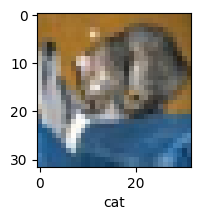

In [21]:
plot_sample(X_test, Y_test, 0)
classes[y_classes[0]]